In [ ]:
import numpy as np
import pandas as pd

# Function to generate data
def generate_data(n, seed):
    np.random.seed(seed)

    sodium_coeff = 1.05

    # Generate data
    Age_years = np.random.normal(65, 5, n)

    Sodium_gr = Age_years / 18 + np.random.normal(0, 1, n)
    # Compute the median of Sodium_gr
    median_value = np.median(Sodium_gr)
    # Convert Sodium_gr to binary values based on the median
    Sodium_gr = (Sodium_gr > median_value).astype(int)

    sbp_in_mmHg = sodium_coeff * Sodium_gr + 2.00 * Age_years + np.random.normal(0, 1, n)
    hypertension = np.where(sbp_in_mmHg > 140, 1, 0)
    Proteinuria_in_mg = 2.00 * sbp_in_mmHg + 2.80 * Sodium_gr + np.random.normal(0, 1, n)

    gt_treatment_effect = np.full(n, sodium_coeff)

    # Combine into a DataFrame
    df = pd.DataFrame({
        'sbp_in_mmHg': sbp_in_mmHg,
        'hypertension': hypertension,
        'Sodium': Sodium_gr,
        'Age_years': Age_years,
        'Proteinuria_in_mg': Proteinuria_in_mg,
        "gt_treatment_effect": gt_treatment_effect,
    })

    return df

# Generate data with specified parameters
ObsData = generate_data(n=1000, seed=777)
# ObsData.to_csv("synthetic_hypertension_sodium_binary_data_no_gt.csv", index=False)

# Display the first few rows of the generated data
print(ObsData.head())

   sbp_in_mmHg  hypertension  Sodium  Age_years  Proteinuria_in_mg
0   124.908993             0       0  62.658956         249.658095
1   122.407913             0       0  60.885876         245.098074
2   129.439669             0       1  64.673099         260.405153
3   121.543446             0       1  61.433190         246.059843
4   139.261665             0       1  69.531754         282.043530


<Axes: >

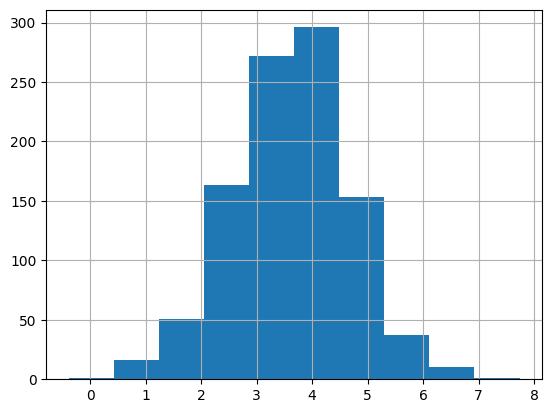

In [5]:
ObsData["Sodium"].hist()